### 정규분포

In [1]:
import numpy as np
import pandas as pd
import scipy as s
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#### 정규분포의 확률밀도 함수
- 평균과 분산에 따라 모양이 결정된다

In [2]:
sigma = 0.8
mu = 4
x = 3

1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( -((x - mu)**2) / (2 * sigma**2) )

0.22831135673627742

In [3]:
stats.norm.pdf(loc=4, scale=0.8, x=3)

0.2283113567362774

In [5]:
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

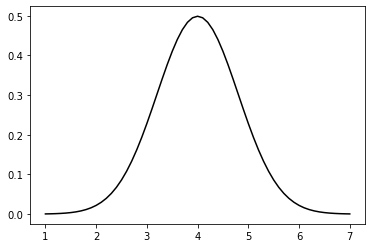

In [8]:
# 시각화
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
        color = 'black');

#### 표본에서 비율
- 모집단의 분포가 위와 같은 경우에 대해 표본이 어떤 값 이하가 되는 비율을 구하려면
- 어떤 값 이하가 되는 데이터의 수 / 샘플사이즈

In [9]:
# 데이터
np.random.seed(13)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([3.43008747, 4.6030131 , 3.96439754, ..., 4.02171792, 3.98389013,
       3.36329979])

In [10]:
# 3이하인 데이터의 개수
np.sum(simulated_sample <= 3)

10565

In [11]:
# 데이터가 3이하인 비율
np.sum(simulated_sample <= 3) / len(simulated_sample)

0.10565

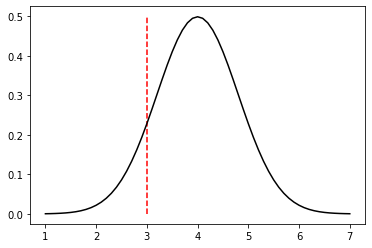

In [15]:
# 그래프로 확인
x_plot = np.arange(start=1, stop=7.1 , step=0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8),
        color = 'black');
plt.vlines(x=3, ymin=0, ymax=0.5, ls='dashed', color='red');

#### 누적분포함수(혹은 분포함수)
- 어떤 값 이하가 되는 확률을 계산한 값

In [16]:
# x가 3이하일 확률의 코드
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

In [17]:
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.5

#### 퍼센트포인트
- 어떤 값 이하가 될 확률을 하측확률
- 어떤 확률이 될 기준치를 퍼센트포인트
- 확률변수 x가 N보다 낮을 확률은 M퍼센트
    - N은 변수
    - M은 확률: 하측확률
    - M을 고정하고 N을 구한느 경우 N: 퍼센트포인트

In [18]:
# 확률이 2.5%가 되는 퍼센트포인트
stats.norm.ppf(loc=4, scale=0.8, q=0.025)

2.4320288123679563

In [19]:
lower = stats.norm.cdf(loc=4, scale=0.8, x=3)
lower

0.10564977366685535

In [22]:
stats.norm.ppf(loc=4, scale=0.8, q=lower)

3.0000000000000004

In [23]:
# 50%가 되는 퍼센트 포인트는 평균!
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

---

### 통계적 추정

In [24]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

In [25]:
# 물고기 몸 길이에 대한 데이터
fish = pd.read_csv('../data/3-7-1-fish_length.csv')['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [26]:
# 평균은 표본평균으로 모집단의 평균을 추정해도 좋다
mu = np.mean(fish)
mu

4.187039324504523

In [27]:
# 모분산의 점추정
sigma_2 = np.var(fish, ddof=1)
sigma_2

0.6803017080832622

- 점 추정: 모집단의 파라미터를 어느 1개의 값으로 추정하는 것
- 모분산의 점 추정으로는 불편분산을 사용

#### 구간추정
- 구간추정: 추정 값이 폭을 가지게 하는 추정 방법
    - 추정 값의 폭 계산에는 확률의 개념을 사용
    - 폭을 가지므로 추정오차를 추측할 수 있음
    - 추정오차가 작으면 구간추정의 폭이 좁아짐
    - 샘플사이즈가 커져도 구간추정의 폭은 좁아짐

#### 신뢰계수와 신뢰구간
- 신뢰계수란 구간추정의 폭에 대한 신뢰 정도를 확률로 표현한 것
- 신뢰구간이란 특정 신뢰계수를 만족하는 구간
- 신뢰한계: 신뢰구간의 하한 값과 상한 값
- 신뢰구간을 계산하는 방법
    - t분포의 퍼센트포인트를 사용
    - 신뢰계수를 95%라고 했을 때 t분포를 따른다면 2.5% 지점과 97.5% 지점을 계산
    - t분포를 따르는 변수가 이 구간에 들어갈 확률은 95%라는 이야기가 됨

In [28]:
# 불편 표준편차로 표준오차 계산
sigma = np.std(fish, ddof=1)
se = sigma / np.sqrt(len(fish))
se

0.2608259396768776

In [29]:
# 신뢰구간 계산
interval = stats.t.interval(
    alpha = 0.95, df = len(fish)-1, loc = mu, scale = se)
interval

(3.597010056835825, 4.777068592173221)

- 95% 신뢰구간은 3.597에서 4.777까지